<center><img src =  ></center>

# **<center><font color='black'>K.J Somaiya College of Engineering</font></center>**

## <center><font color='red'>Engineering Final Year Project</font></center>

## <center>**<font color='purple'>InsureBuddy - An Insurance Recommender System</font></center>**


### **Author:**
### **Sujay Torvi**
### Co-Authors:
### 1. Krupen Shah
### 2. Harsh Somaiya
### 3. Tirth Desai

### Copyright© 2020 Under MIT License 

## **<font color='purple'>`Problem Statement: To process, analyse and mine the data for useful insights in insurance product recommendation and model them using various algorithms, and deploying them into an application which would provide the user with useful insurance product recommendations`</font>**

## **IV. Machine Learning - I**


### Traditional ML Algorithms(Naive Bayes,SVM,Random Forest,Boosting,KNN)

## **Source of Dataset:**
### **Zimnnat Insurance Recommendation Dataset**

URL: https://zindi.africa/competitions/zimnat-insurance-recommendation-challenge

<br>

**<font color='red'>Important:</font>**

**<font color='purple'>Since no metadata is given for this dataset we are free to remove and impute our own attributes</font>**

### Load the dataset 

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [46]:
from google.colab import files
u = files.upload()

Saving Testing_Data.xlsx to Testing_Data (1).xlsx
Saving Training_Data_rebalanced.xlsx to Training_Data_rebalanced (1).xlsx


In [47]:
train = pd.read_excel('Training_Data_rebalanced.xlsx')

In [48]:
test = pd.read_excel('Testing_Data.xlsx')

In [49]:
test = test[['sex', 'marital_status', 'age_group', 'occupation_category_code',\
       'Annual_Income', 'Policy 1', 'Policy 2',\
       'Policy 5', 'Policy 6', 'Policy 7']]

In [50]:
test.columns = ['sex', 'marital_status', 'age_group', 'occupation_category_code',\
       'Annual_Income', 'Policy 1', 'Policy 2',\
       'Policy 3', 'Policy 4', 'Policy 5']

In [51]:
test = test[['sex', 'marital_status', 'age_group', 'occupation_category_code','Annual_Income','Policy 1','Policy 2','Policy 3','Policy 4','Policy 5']]

In [52]:
test.head()

,sex,marital_status,age_group,occupation_category_code,Annual_Income,Policy 1,Policy 2,Policy 3,Policy 4,Policy 5
0,1,0,0,1,1,1,1,0,0,0
1,1,0,0,2,1,1,1,0,0,0
2,0,0,1,2,3,1,1,0,0,0
3,0,0,0,0,1,0,0,0,1,1
4,1,0,0,0,1,1,1,0,0,0


In [53]:
#train = train[['sex', 'marital_status', 'age_group', 'occupation_category_code','Annual_Income','Policy 8','Policy 15','Policy 16','Policy 9','Policy 2','Policy 18','Policy 19','Policy 21']]

In [54]:
train = train[['sex', 'marital_status', 'age_group', 'occupation_category_code','Annual_Income','Policy 1','Policy 2','Policy 3','Policy 4','Policy 5']]

In [55]:
train.head()

,sex,marital_status,age_group,occupation_category_code,Annual_Income,Policy 1,Policy 2,Policy 3,Policy 4,Policy 5
0,0,0,0,0,1,1,1,0,0,0
1,0,0,0,0,1,1,1,0,0,0
2,1,1,0,4,1,1,0,0,0,0
3,1,0,0,2,1,1,1,0,0,0
4,1,0,0,0,1,0,0,0,1,1


### Perform Some preprocessing

### Label Encode all the columns

In [56]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
le = preprocessing.LabelEncoder()

In [57]:
train = pd.DataFrame(train.apply(preprocessing.LabelEncoder().fit_transform))

In [58]:
train.head()

,sex,marital_status,age_group,occupation_category_code,Annual_Income,Policy 1,Policy 2,Policy 3,Policy 4,Policy 5
0,0,0,0,0,1,1,1,0,0,0
1,0,0,0,0,1,1,1,0,0,0
2,1,1,0,4,1,1,0,0,0,0
3,1,0,0,2,1,1,1,0,0,0
4,1,0,0,0,1,0,0,0,1,1


In [59]:
train.occupation_category_code.unique()

array([0, 4, 2, 3, 1])

In [60]:
train.age_group.unique()

array([0, 1, 2, 3])

In [61]:
train.Annual_Income.unique()

array([1, 5, 2, 0, 3, 4])

In [62]:
!pip install scikit-multilearn

In [63]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier

In [64]:
from sklearn.ensemble import GradientBoostingClassifier

In [65]:
X_train = train[train.columns[:5]]
X_test = test[test.columns[:5]]
y_train = train[train.columns[5:]]
y_test = test[test.columns[5:]]

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier

In [67]:
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.naive_bayes import ComplementNB

### Approaches to Multi-Label Classification Problems

### Approach #1 Binary Relevance

### A multi label problem is broken down into several single label problems

This is the simplest technique, which basically treats each label as a separate single class classification problem.

<img src = https://cdn.analyticsvidhya.com/wp-content/uploads/2017/08/25230613/Screen-Shot-2017-08-21-at-1.42.27-AM.png>


For example, let us consider a case as shown below. We have the data set like this, where X is the independent feature and Y’s are the target variable.

<img src = https://cdn.analyticsvidhya.com/wp-content/uploads/2017/08/25230630/Screen-Shot-2017-08-21-at-1.46.00-AM.png>


### Logistic Regression

In [68]:
classifier1 = BinaryRelevance(LogisticRegression(random_state = 17))
classifier1.fit(X_train, y_train)
predictions1 = classifier1.predict(X_test)
predictions_1 = classifier1.predict(X_train)
print('Train accuracy is {}%'.format(accuracy_score(y_train, predictions_1)*100))
print('Test accuracy is {}%'.format(accuracy_score(y_test, predictions1)*100))

Train accuracy is 77.48443499576979%
Test accuracy is 64.15202663910897%


### Bernoulli NB

In [69]:
classifier2 = BinaryRelevance(BernoulliNB())
classifier2.fit(X_train, y_train)
predictions2 = classifier2.predict(X_test)
predictions_2 = classifier2.predict(X_train)
print('Train accuracy is {}%'.format(accuracy_score(y_train, predictions_2)*100))
print('Test accuracy is {}%'.format(accuracy_score(y_test, predictions2)*100))

Train accuracy is 79.59954010022344%
Test accuracy is 67.37857388908026%


### RandomForest

In [70]:
classifier3 = BinaryRelevance(RandomForestClassifier(n_estimators=6))
classifier3.fit(X_train, y_train)
predictions3 = classifier3.predict(X_test)
predictions_3 = classifier3.predict(X_train)
print('Train accuracy is {}%'.format(accuracy_score(y_train, predictions_3)*100))
print('Test accuracy is {}%'.format(accuracy_score(y_test, predictions3)*100))

Train accuracy is 81.84480551879732%
Test accuracy is 70.96107475025836%


In [71]:
from sklearn.svm import SVC

### Support Vector Machine Classifier

In [72]:
classifier4 = BinaryRelevance(SVC())
classifier4.fit(X_train, y_train)
predictions4 = classifier4.predict(X_test)
predictions_4 = classifier4.predict(X_train)
print('Train accuracy is {}%'.format(accuracy_score(y_train, predictions_4)*100))
print('Test accuracy is {}%'.format(accuracy_score(y_test, predictions4)*100))

Train accuracy is 82.1094648241751%
Test accuracy is 71.45481685612584%


### Approach #2 Classifier Chain 

In this, the first classifier is trained just on the input data and then each next classifier is trained on the input space and all the previous classifiers in the chain.  

<img src = https://cdn.analyticsvidhya.com/wp-content/uploads/2017/08/25230735/Screen-Shot-2017-08-25-at-12.41.13-AM.png>

Let’s try to this understand this by an example. In the dataset given below, we have X as the input space and Y’s as the labels.

<img src = https://cdn.analyticsvidhya.com/wp-content/uploads/2017/08/25233225/Screen-Shot-2017-08-25-at-11.31.58-PM.png>


### NB

In [73]:
from skmultilearn.problem_transform import ClassifierChain
classifier5 = ClassifierChain(BernoulliNB())
classifier5.fit(X_train, y_train)
predictions5 = classifier5.predict(X_test)
predictions_5 = classifier5.predict(X_train)
print('Train accuracy is {}%'.format(accuracy_score(y_train, predictions_5)*100))
print('Test accuracy is {}%'.format(accuracy_score(y_test, predictions5)*100))

Train accuracy is 79.40863830618045%
Test accuracy is 67.05706740153865%


### RF Classifier

In [74]:
from skmultilearn.problem_transform import ClassifierChain
classifier6 = ClassifierChain(RandomForestClassifier(n_estimators = 7))
classifier6.fit(X_train, y_train)
predictions6 = classifier6.predict(X_test)
predictions_6 = classifier6.predict(X_train)
print('Train accuracy is {}%'.format(accuracy_score(y_train, predictions_6)*100))
print('Test accuracy is {}%'.format(accuracy_score(y_test, predictions6)*100))

Train accuracy is 82.18973035121591%
Test accuracy is 71.54667585256631%


### Gradient Boosting Classifier

In [75]:
from skmultilearn.problem_transform import ClassifierChain
classifier7 = ClassifierChain(GradientBoostingClassifier(random_state = 999))
classifier7.fit(X_train, y_train)
predictions7 = classifier7.predict(X_test)
predictions_7 = classifier7.predict(X_train)
print('Train accuracy is {}%'.format(accuracy_score(y_train, predictions_7)*100))
print('Test accuracy is {}%'.format(accuracy_score(y_test, predictions7)*100))

Train accuracy is 82.15719027268585%
Test accuracy is 71.5237111034562%


### SVC

In [76]:
from skmultilearn.problem_transform import ClassifierChain
classifier8 = ClassifierChain(SVC(kernel='rbf'))
classifier8.fit(X_train, y_train)
predictions8 = classifier8.predict(X_test)
predictions_8 = classifier8.predict(X_train)
print('Train accuracy is {}%'.format(accuracy_score(y_train, predictions_8)*100))
print('Test accuracy is {}%'.format(accuracy_score(y_test, predictions8)*100))

Train accuracy is 82.15935961125453%
Test accuracy is 71.53519347801125%


### LabelPowerSet

In this, we transform the problem into a multi-class problem with one multi-class classifier is trained on all unique label combinations found in the training data.

Let’s understand it by an example
<img src = https://cdn.analyticsvidhya.com/wp-content/uploads/2017/08/25230858/Screen-Shot-2017-08-25-at-12.46.30-AM.png>

In this, we find that x1 and x4 have the same labels, similarly, x3 and x6 have the same set of labels. So, label powerset transforms this problem into a single multi-class problem as shown below.

<img src = https://cdn.analyticsvidhya.com/wp-content/uploads/2017/08/25230915/Screen-Shot-2017-08-25-at-12.46.37-AM.png>

So, label powerset has given a unique class to every possible label combination that is present in the training set.


In [77]:
from skmultilearn.problem_transform import LabelPowerset
classifier9 = LabelPowerset(RandomForestClassifier(n_estimators = 9))
classifier9.fit(X_train, y_train)
predictions9 = classifier9.predict(X_test)
predictions_9 = classifier9.predict(X_train)
print('Train accuracy is {}%'.format(accuracy_score(y_train, predictions_9)*100))
print('Test accuracy is {}%'.format(accuracy_score(y_test, predictions9)*100))

Train accuracy is 82.18973035121591%
Test accuracy is 71.56964060167643%


### Adapted Algorithm

In [78]:
from skmultilearn.adapt import MLkNN

classifier10 = MLkNN(k=50)

# train
classifier10.fit(np.asarray(X_train), np.asarray(y_train))

# predict
predictions_10 = classifier10.predict(X_train)
predictions10 = classifier10.predict(X_test)
print('Train accuracy is {}%'.format(accuracy_score(y_train, predictions_10)*100))
print('Test accuracy is {}%'.format(accuracy_score(y_test, predictions10)*100))

Train accuracy is 64.51395969368939%
Test accuracy is 43.598576185555174%


### Results

### Random Forest

In [79]:
from sklearn.metrics import multilabel_confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

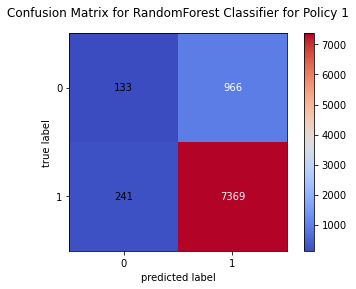

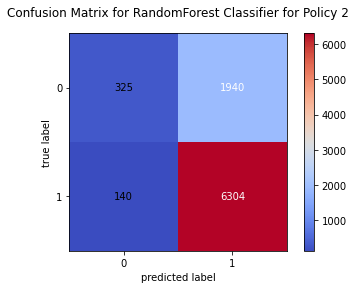

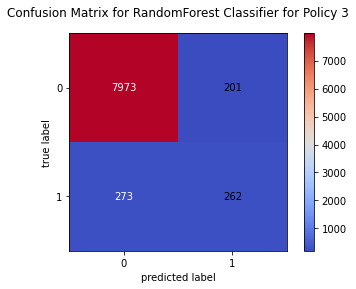

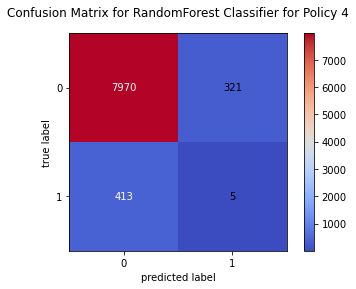

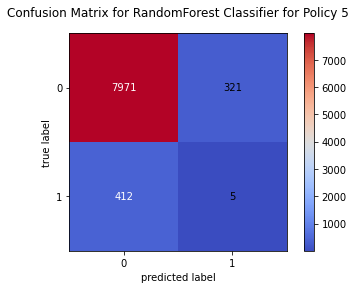

In [80]:
cm1 = multilabel_confusion_matrix(y_test, predictions6)
for i in range(0,5):
  fig, ax = plot_confusion_matrix(conf_mat=cm1[i],cmap='coolwarm',colorbar=True)
  plt.title('Confusion Matrix for RandomForest Classifier for Policy {}'.format(i+1))
  plt.show()

### SVM Classifier

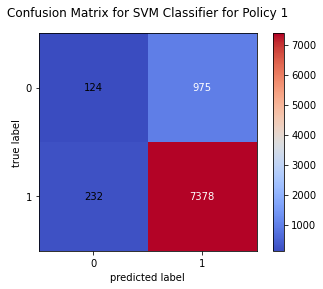

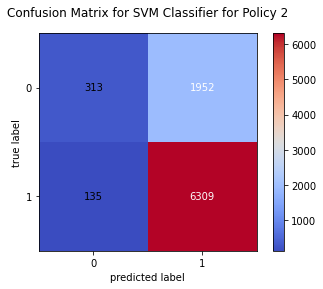

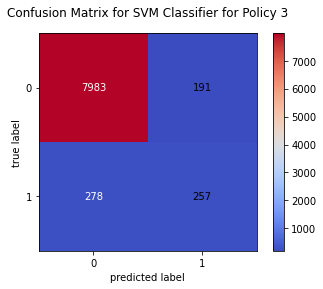

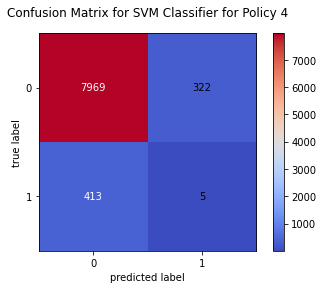

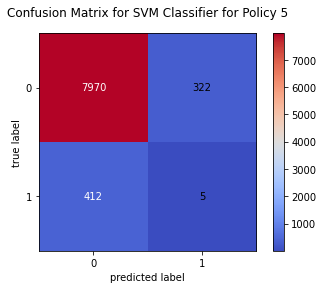

In [81]:
cm2 = multilabel_confusion_matrix(y_test, predictions8)
for i in range(0,5):
  fig, ax = plot_confusion_matrix(conf_mat=cm2[i],cmap='coolwarm',colorbar=True)
  plt.title('Confusion Matrix for SVM Classifier for Policy {}'.format(i+1))
  plt.show()

### Naive Bayes

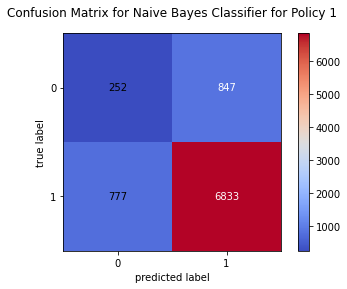

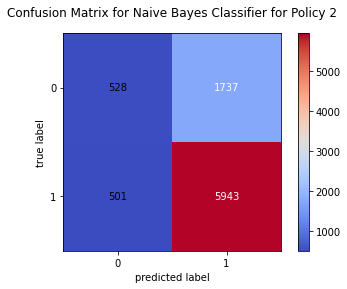

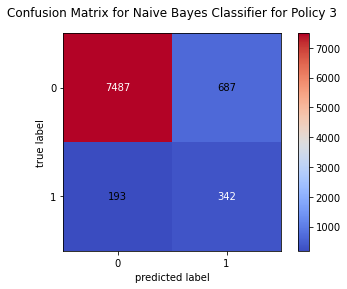

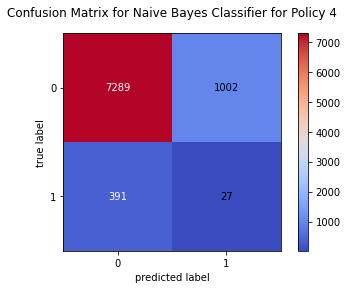

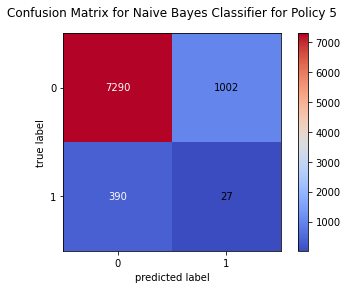

In [82]:
cm3 = multilabel_confusion_matrix(y_test, predictions5)
for i in range(0,5):
  fig, ax = plot_confusion_matrix(conf_mat=cm3[i],cmap='coolwarm',colorbar=True)
  plt.title('Confusion Matrix for Naive Bayes Classifier for Policy {}'.format(i+1))
  plt.show()

### Boosting

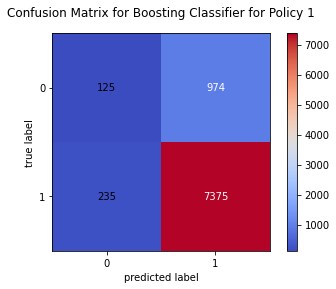

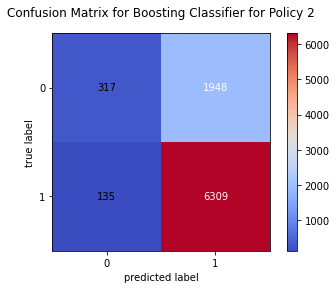

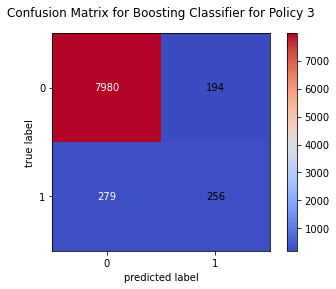

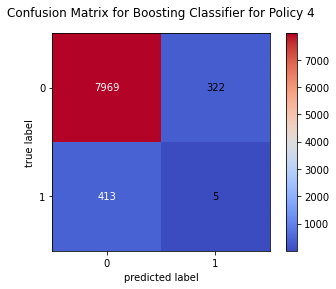

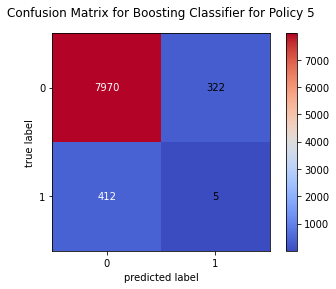

In [83]:
cm4 = multilabel_confusion_matrix(y_test, predictions7)
for i in range(0,5):
  fig, ax = plot_confusion_matrix(conf_mat=cm4[i],cmap='coolwarm',colorbar=True)
  plt.title('Confusion Matrix for Boosting Classifier for Policy {}'.format(i+1))
  plt.show()

### KNN Classifier

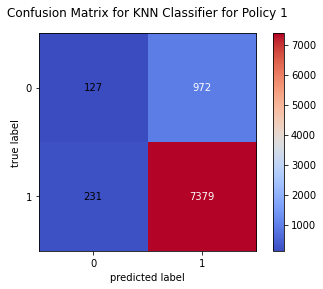

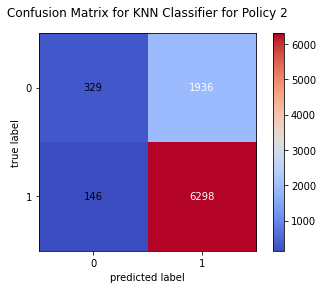

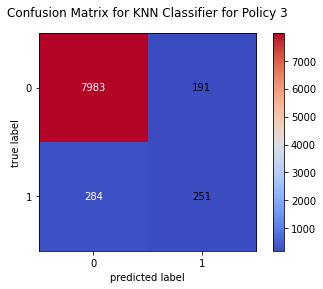

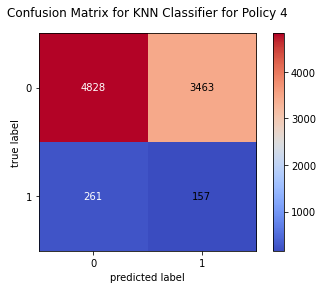

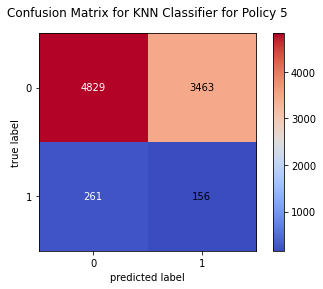

In [84]:
cm5 = multilabel_confusion_matrix(y_test, predictions10)
for i in range(0,5):
  fig, ax = plot_confusion_matrix(conf_mat=cm5[i],cmap='coolwarm',colorbar=True)
  plt.title('Confusion Matrix for KNN Classifier for Policy {}'.format(i+1))
  plt.show()

### Classification Report

In [85]:
from sklearn.metrics import classification_report

In [86]:
target_names = ['Policy 1', 'Policy 2', 'Policy 3', 'Policy 4', 'Policy 5']

In [87]:
# Classifier Reports
print('=======================================================')
print('Report for Random Forest Classifier')
print(classification_report(y_test, predictions6, target_names=target_names))
print('=======================================================')
print('Report for Boosting Classifier')
print(classification_report(y_test, predictions7, target_names=target_names))
print('=======================================================')
print('Report for SVM Classifier')
print(classification_report(y_test, predictions8, target_names=target_names))
print('=======================================================')
print('Report for Naive Bayes Classifier')
print(classification_report(y_test, predictions5, target_names=target_names))
print('=======================================================')
print('Report for KNN Classifier')
print(classification_report(y_test, predictions10, target_names=target_names))

Report for Random Forest Classifier
              precision    recall  f1-score   support

    Policy 1       0.88      0.97      0.92      7610
    Policy 2       0.76      0.98      0.86      6444
    Policy 3       0.57      0.49      0.53       535
    Policy 4       0.02      0.01      0.01       418
    Policy 5       0.02      0.01      0.01       417

   micro avg       0.79      0.90      0.84     15424
   macro avg       0.45      0.49      0.47     15424
weighted avg       0.78      0.90      0.83     15424
 samples avg       0.80      0.85      0.81     15424

Report for Boosting Classifier
              precision    recall  f1-score   support

    Policy 1       0.88      0.97      0.92      7610
    Policy 2       0.76      0.98      0.86      6444
    Policy 3       0.57      0.48      0.52       535
    Policy 4       0.02      0.01      0.01       418
    Policy 5       0.02      0.01      0.01       417

   micro avg       0.79      0.90      0.84     15424
   macro a

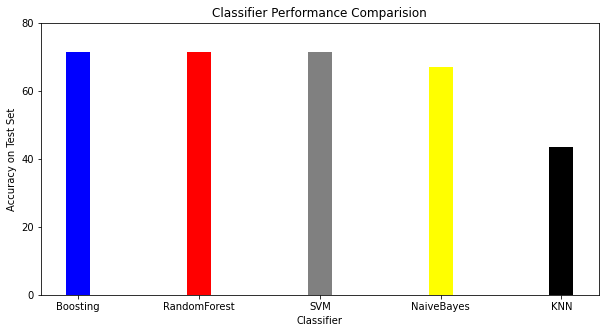

In [88]:
data = {'Boosting':accuracy_score(y_test, predictions7)*100, 'RandomForest':accuracy_score(y_test, predictions6)*100, 'SVM':accuracy_score(y_test, predictions8)*100,  'NaiveBayes':accuracy_score(y_test, predictions5)*100,'KNN':accuracy_score(y_test, predictions10)*100} 
clf = list(data.keys()) 
values = list(data.values()) 
   
fig = plt.figure(figsize = (10, 5)) 
  
# creating the bar plot 
plt.bar(clf, values, color =['blue','red','gray','yellow','black'],  width = 0.2) 
plt.yticks(np.arange(0, 100, 20))
plt.xlabel("Classifier") 
plt.ylabel("Accuracy on Test Set") 
plt.title("Classifier Performance Comparision") 
plt.show() 

### **<center>Lets Draw A Comparision**


|Model Name| Training Accuracy | Testing Accuracy 
| --- | --- | --- |
| Random Forest| 82% | 71% | 
| Boosting | 82% | 71% | 
| SVM |  82% | 71% | 
| Naive Bayes | 79% | 67% | 5000 | 
| KNN | 64% | 43% | 10000 | 

### Save the models

In [89]:
import pickle 
filename = 'RFClassifier.sav'
pickle.dump(classifier6, open(filename, 'wb'))

### References:

### 1. https://www.analyticsvidhya.com/blog/2017/08/introduction-to-multi-label-classification

### 2. https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

### 3. https://scikit-learn.org/stable/modules/generated/sklearn.metrics.multilabel_confusion_matrix.html

### 4. https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/